# Import Stuff

In [27]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Default Code, Don't Edit This

In [28]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

def sum_over(*args):
    return sum(args)

In [29]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [30]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
#for unc in dike_model.uncertainties:
    #print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

In [31]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
#for policy in dike_model.levers:
    #print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

In [32]:
#enlisting outcomes
#for outcome in dike_model.outcomes:
    #print(repr(outcome))

# Creating the Policies
### Edit this stuff

In [103]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy
#testing Secnario 0 - Baseline
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]

# Running the Model
### You can edit the number of scenarios to help adjust runtime, more is kind of better

In [104]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 1000
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [39:03<00:00,  2.34s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [105]:
experiments, outcomes = results
experiments.to_csv('./output/00_Policy_0_Experiments.csv', index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/00_Policy_0_Outcomes.csv', index=False)

### Edit the column for outcome to see different results

In [106]:
from ema_workbench.analysis import prim
x = experiments
y = outcomes["A.2 Total Costs"] < 2.5e+08
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 1000 points remaining, containing 819 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.661, coverage: 0.8070818070818071, density: 1.0 restricted_dimensions: 1


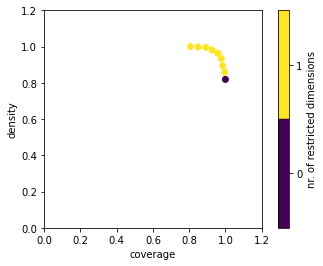

In [107]:
box1.show_tradeoff()
plt.show()

### Edit the column for outcome to see different results

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


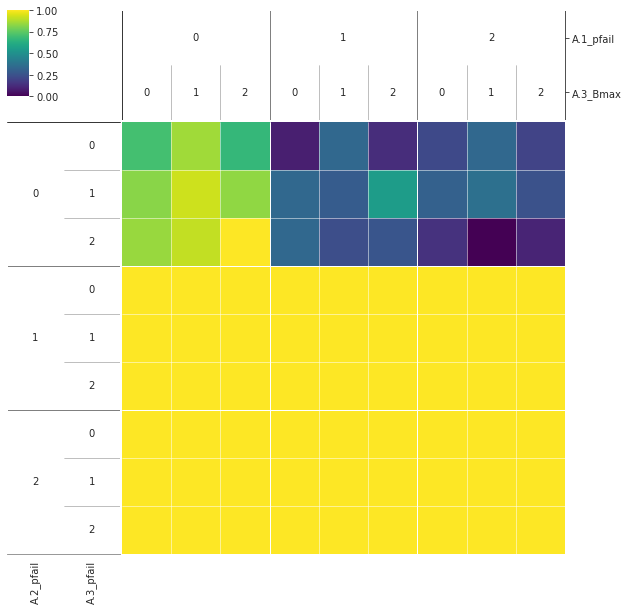

1000


In [109]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["A.2 Total Costs"] < 2.5e08

dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()
print(len(y))


### change which parts of the experiments table it outputs to see the figure better

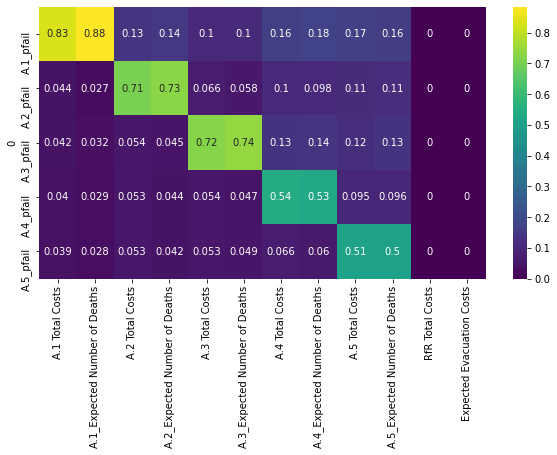

In [110]:
from ema_workbench.analysis import feature_scoring

x = experiments.loc[:,['A.1_pfail', 'A.2_pfail', 'A.3_pfail', 'A.4_pfail', 'A.5_pfail']]
y = outcomes

plt.figure(figsize = (10,5))

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True, )

plt.show()

__OUTPUT PLOTTER__

The first cell just creates the dictionaries from the output, the second and third cell do the plots. Then we make the Dataframe

 __First fill in the run number below__  (as a string, just fill it in between the quotation marks)

In [171]:
run_number = "0_0" # Run number plz

In [176]:
A1_cost = outcomes["A.1 Total Costs"]
A2_cost = outcomes["A.2 Total Costs"]
A3_cost = outcomes["A.3 Total Costs"]
A4_cost = outcomes["A.4 Total Costs"]
A5_cost = outcomes["A.5 Total Costs"]
A1_death = outcomes["A.1_Expected Number of Deaths"]
A2_death = outcomes["A.2_Expected Number of Deaths"]
A3_death = outcomes["A.3_Expected Number of Deaths"]
A4_death = outcomes["A.4_Expected Number of Deaths"]
A5_death = outcomes["A.5_Expected Number of Deaths"]
costs = [A1_cost,A2_cost,A3_cost,A4_cost,A5_cost]
death = [A1_death,A2_death,A3_death,A4_death,A5_death]
costs_dict = {}
death_dict = {}
for i in range(len(costs)):
    segment_costs = costs[i]
    segment_death = death[i]
    avg_costs = np.average(segment_costs)
    avg_death = np.average(segment_death)
    costs_dict['Costs A' + str(i+1)] = avg_costs
    death_dict['Deaths A' + str(i+1)] = avg_death


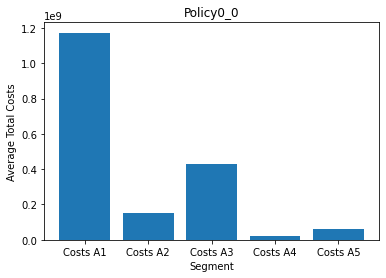

In [177]:
names = list(costs_dict.keys())
values = list(costs_dict.values())

plt.bar(range(len(costs_dict)), values, tick_label=names)
plt.xlabel('Segment')
plt.ylabel('Average Total Costs')
plt.title("Policy" + str(run_number))
plt.show()

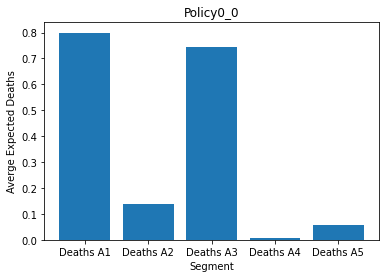

In [178]:
names = list(death_dict.keys())
values = list(death_dict.values())

plt.bar(range(len(death_dict)), values, tick_label=names)
plt.xlabel('Segment')
plt.ylabel('Averge Expected Deaths')
plt.title("Policy" + str(run_number))
plt.show()

In [179]:
df_costs = pd.DataFrame([costs_dict], index=["Policy" + str(run_number),])
df_death = pd.DataFrame([death_dict], index=["Policy" + str(run_number),])

In [181]:
df = pd.concat([df_costs,df_death],axis=1)
df 

,Costs A1,Costs A2,Costs A3,Costs A4,Costs A5,Deaths A1,Deaths A2,Deaths A3,Deaths A4,Deaths A5
Policy0_0,1.172700e+09,1.542487e+08,4.299761e+08,1.900943e+07,6.362715e+07,0.799299,0.140017,0.745159,0.008403,0.05562


__RUN THIS ONLY ONCE__ on the first time you run the code

In [189]:
Master_df = df #RUN THIS ONLY ONCE!!!!!!

__RUN THIS EVERY TIME YOU DO A NEW RUN__

In [190]:
Master_df = pd.concat([Master_df,df],axis=0)

In [191]:
Master_df

,Costs A1,Costs A2,Costs A3,Costs A4,Costs A5,Deaths A1,Deaths A2,Deaths A3,Deaths A4,Deaths A5
Policy0_0,1.172700e+09,1.542487e+08,4.299761e+08,1.900943e+07,6.362715e+07,0.799299,0.140017,0.745159,0.008403,0.05562
Policy0_0,1.172700e+09,1.542487e+08,4.299761e+08,1.900943e+07,6.362715e+07,0.799299,0.140017,0.745159,0.008403,0.05562
